In [1]:
import pandas as pd
import numpy as np
import bilby
import pickle
import corner

import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [4]:
zcorner_default_kwargs = dict(
            bins=50, smooth=1.,
            smooth1d=0.8,
            show_titles=False,
            title_kwargs=dict(fontsize=20),
            title_fmt='.2f',
            label_kwargs = dict(color = 'black', fontsize = 20),
            truth_color='black', 
            plot_density=True, plot_datapoints=False, fill_contours=True,
            max_n_ticks=3, labelpad=-0.02
            )

In [6]:
# load dictionary of events
case2_dictionary_path = 'data/case2_events_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_dict = pickle.load(f)

In [9]:
red_cosmo_params = ['H0', 'mu_g', 'sigma_g']

In [10]:
path_to_zbin1 = case2_dict['case2_zbin']['case2_1e5inj_zbin1']
zbin1_pe = bilby.core.result.read_in_result(path_to_zbin1).posterior
zbin1_pe_sel = zbin1_pe[red_cosmo_params]

path_to_zbin2 = case2_dict['case2_zbin']['case2_1e5inj_zbin2']
zbin2_pe = bilby.core.result.read_in_result(path_to_zbin2).posterior
zbin2_pe_sel = zbin2_pe[red_cosmo_params]

path_to_zbin3 = case2_dict['case2_zbin']['case2_1e5inj_zbin3']
zbin3_pe = bilby.core.result.read_in_result(path_to_zbin3).posterior
zbin3_pe_sel = zbin3_pe[red_cosmo_params]

In [7]:
shade1 = '#2f4f4f'
shade2 = '#D2691E'
shade3 = '#DAA520'

In [11]:
red_cosmo_corner_lbs = ['$H_0$\n [km s$^{-1}$ Mpc$^{-1}$]',  
              '$\\mu_{\\rm g}$\n [$M_{\odot}$]', 
              '$\\sigma_{\\rm g}$\n [$M_{\odot}$]'
            ]
red_injected_values_redshift = pd.DataFrame.from_dict({'H0':173.28*np.ones(1), 
                   'mu_g':40.9*np.ones(1), 
                   'sigma_g':7.63*np.ones(1)
                })

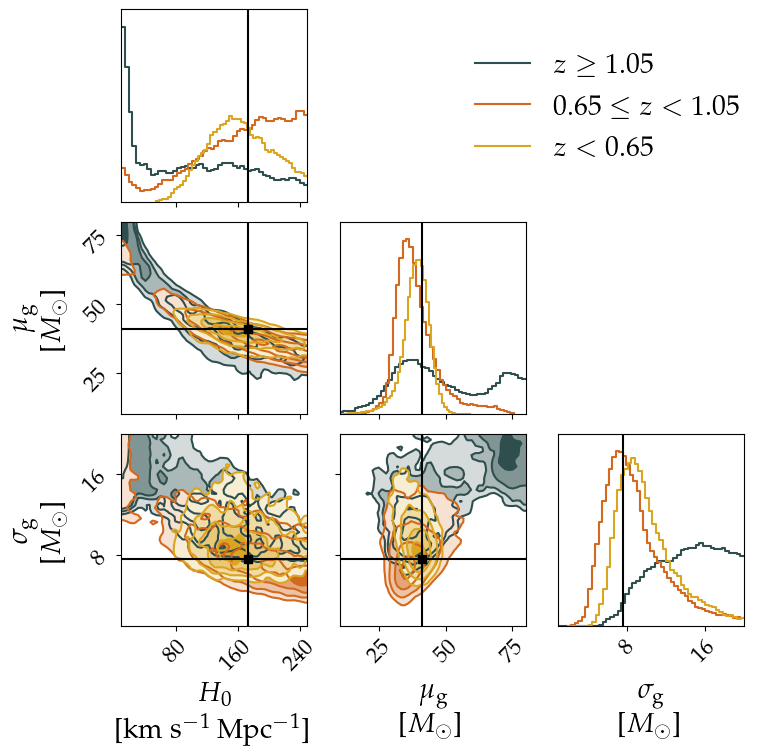

In [13]:
figure = corner.corner(zbin3_pe_sel, labels = red_cosmo_corner_lbs, color = shade1,
                       rect=[0, 0, 1, 1], **zcorner_default_kwargs)
corner.corner(zbin2_pe_sel, labels = red_cosmo_corner_lbs, color = shade2, fig = figure,
                       rect=[0, 0, 1, 1], **zcorner_default_kwargs)
corner.corner(zbin1_pe_sel, labels = red_cosmo_corner_lbs, color = shade3, truths = red_injected_values_redshift.iloc[0].to_numpy(),
                        fig = figure,
                        rect=[0, 0, 1, 1],**zcorner_default_kwargs)
    
# Adjust tick parameters for all axes
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
   
figure.legend(['$z\ge 1.05$', '$0.65\le z<1.05$', '$z<0.65$'], loc = 'center', ncol = 1, 
              bbox_to_anchor = (0.8, 0.85), fontsize = 20, frameon=False)
plt.tight_layout()
plt.savefig('plots/red_corner_zbins.pdf')
plt.show()
plt.close()